In [1]:
%matplotlib inline

In [2]:
from sdclane import config, utility, camera, line_detection, lane_detection


import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lane_detector = lane_detection.LaneDetector()

/root/anaconda3/lib/python3.5/site-packages/skimage/measure/fit.py:57: skimage_deprecation: `LineModel` is deprecated, use `LineModelND` instead.
  warn(skimage_deprecation('`LineModel` is deprecated, '


In [4]:
test_imgs = utility.read_rgb_imgs(config.test_img_files)

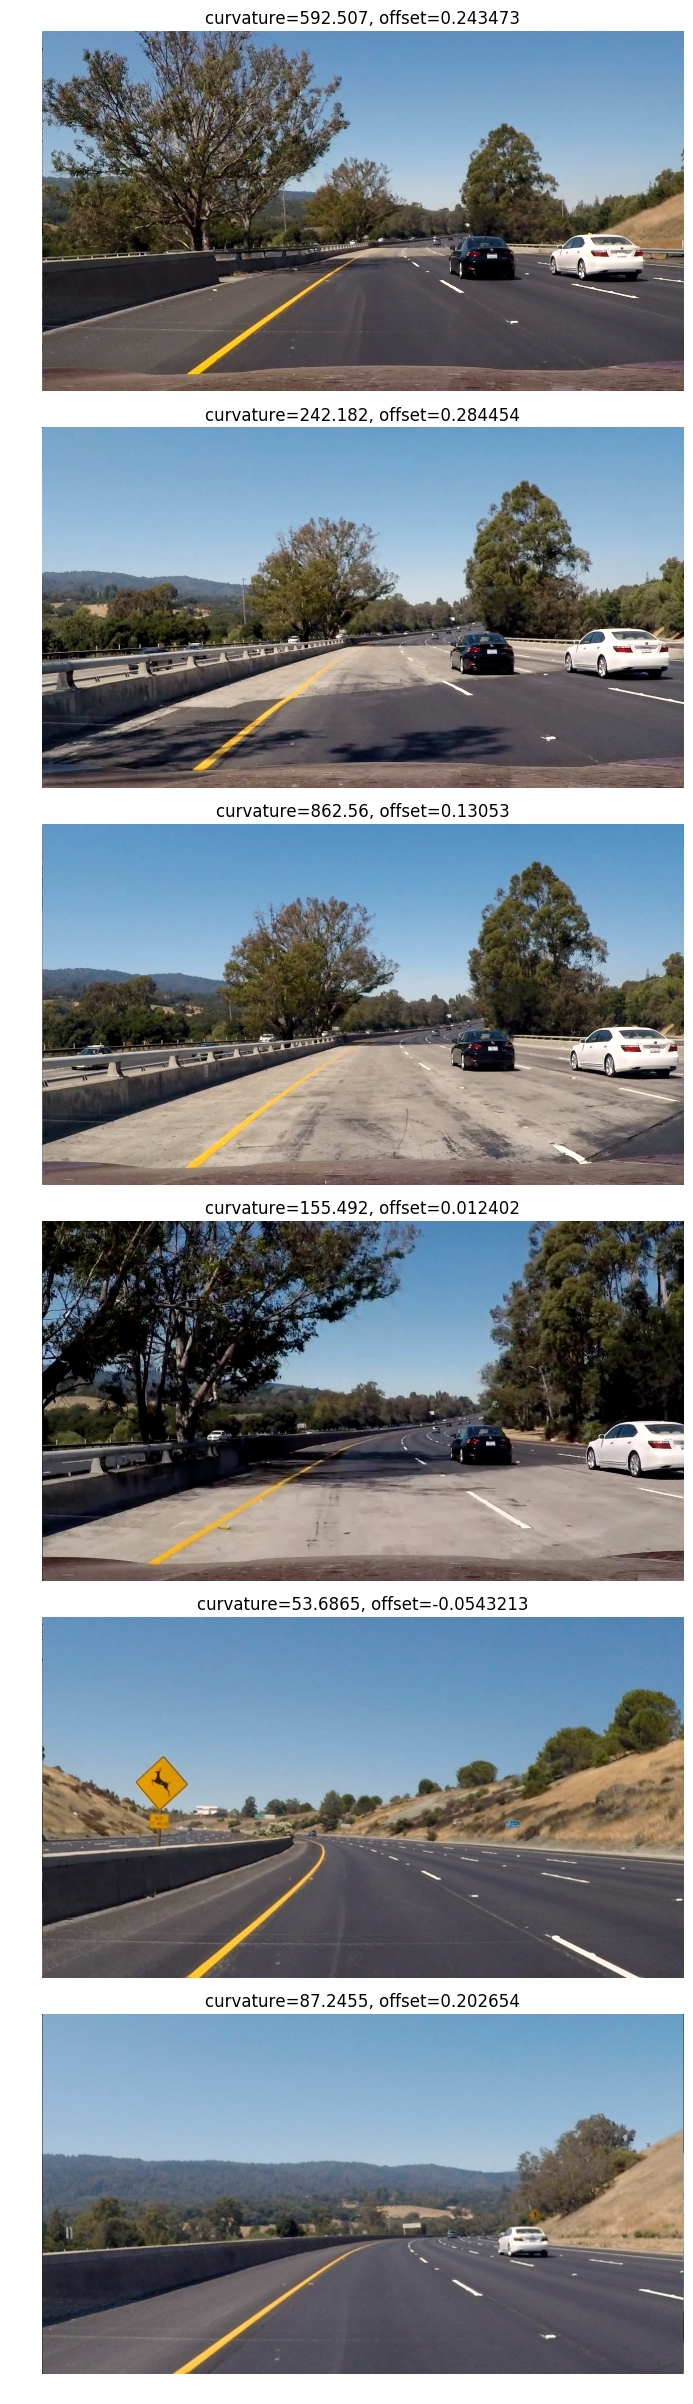

In [8]:
fig, axes = plt.subplots(6, 1, figsize = (8*1, 4*6))
axes=axes.ravel()
fig.tight_layout()
fig.subplots_adjust(wspace = 0.1, hspace=0.1, )


for ax, test_img in zip(axes, test_imgs):
    ax.imshow(test_img, cmap=plt.cm.gray)
#     ax[0].set_title("original")
    
    ax.set_axis_off()
    
    
    lxs, lys, mxs, mys, rxs, rys, lmodel, mmodel, rmodel, curvature, offset = lane_detector.detect_lane(test_img)
    ax.set_title("curvature=%g, offset=%g" % (curvature, offset))
#     ax[1].imshow(test_img, cmap=plt.cm.gray)
#     ax[1].scatter(mxs, mys, marker="o", color="red")
#     ax[1].scatter(lxs, lys, marker="o", color="blue")
#     ax[1].scatter(rxs, rys, marker="o", color="green")

#     y_span = range(0, test_img.shape[0]+1)
#     lxhat = np.polyval(lmodel, y_span)
#     mxhat = np.polyval(mmodel, y_span)
#     rxhat = np.polyval(rmodel, y_span)
    
#     lane_img = np.zeros_like(test_img, dtype=np.uint8)
#     for xs, col in zip([lxhat.astype(np.int32), mxhat.astype(np.int32), rxhat.astype(np.int32)], 
#                        [(255,0,0), (0,255,0), (0,0,255)]):
#         pts = np.array([(x, y) for x, y in zip(xs, y_span)])
#         lane_img = cv2.polylines(lane_img, [pts], isClosed=False, color=col, thickness=5)

#     lane_img = lane_detector.transformer.transform(lane_img, inverse=True)
#     lane_img = cv2.addWeighted(test_img, 0.5, lane_img, 1.5, 1)
#     ax[1].imshow(lane_img)
#     ax[1].set_title("curvature=%g, offset=%g" % (curvature, offset))

In [6]:
print(np.poly1d(lmodel))

          2
0.000721 x - 1.001 x + 603.2


In [ ]:
lane_detector.transformer.